# Check performance after increasing the batch size

In [5]:
from torchvision import datasets
import torch

data_folder = "C:/Users/user/data/FMNIST/"
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets= fmnist.targets

In [6]:
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from torch.utils.data import DataLoader, Dataset
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [8]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1, 28*28)
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, ix):
        return self.x[ix].to(device), self.y[ix].to(device)

In [9]:
## get_data
def get_data(batchsize):
    train = FMNISTDataset(tr_images, tr_targets)
    trainloader = DataLoader(train, batch_size= batchsize, shuffle=True)
    
    val = FMNISTDataset(val_images, val_targets)
    valloader = DataLoader(val, batch_size= batchsize, shuffle=False)
    
    return trainloader, valloader

In [14]:
## get model

from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
            nn.Linear(28*28, 1000),
            nn.ReLU(),
            nn.Linear(1000, 10)
    ).to(device)
    
    loss = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=0.01)
    return model, loss, optimizer

def train_batch(x, y, model, loss, opt):
    model.train()
    opt.zero_grad()
    pred = model(x)
    batch_loss = loss(pred, y)
    batch_loss.backward()
    opt.step()
    
    return batch_loss.item()


@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    pred = model(x)
    max_val, argmax = pred.max(-1)
    is_correct = y == argmax
    return is_correct.cpu().numpy().tolist()


@torch.no_grad()
def val_loss(x, y, model, loss):
    model.eval()
    pred = model(x)
    val_loss = loss(pred, y)
    return val_loss.item()

In [15]:
import time

start = time.time()
trainloader, valloader = get_data(32)
model, loss, opt = get_model()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_losses, val_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trainloader)):
        x, y = batch
        batch_loss = train_batch(x, y, model, loss, opt)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trainloader)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)


    for ix, batch in enumerate(iter(valloader)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss)
        val_epoch_accuracies.extend(val_is_correct)
        val_epoch_losses.append(validation_loss)
        
    val_epoch_accuracy = np.mean(val_is_correct)
    val_epoch_loss = np.array(val_epoch_losses).mean()
    
    
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)
    

end = time.time()
print("Total time taken: ", end-start)

0
1
2
3
4
Total time taken:  98.53118014335632


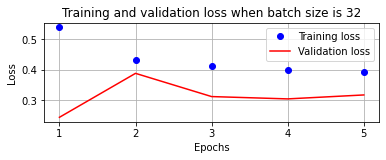

C:\Users\user\AppData\Local\Temp\ipykernel_10976\1316040814.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


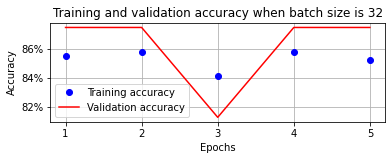

In [16]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [17]:
import time

start = time.time()
trainloader, valloader = get_data(10000)
model, loss, opt = get_model()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_losses, val_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trainloader)):
        x, y = batch
        batch_loss = train_batch(x, y, model, loss, opt)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trainloader)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)


    for ix, batch in enumerate(iter(valloader)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss)
        val_epoch_accuracies.extend(val_is_correct)
        val_epoch_losses.append(validation_loss)
        
    val_epoch_accuracy = np.mean(val_is_correct)
    val_epoch_loss = np.array(val_epoch_losses).mean()
    
    
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)
    

end = time.time()
print("Total time taken: ", end-start)

0
1
2
3
4
Total time taken:  77.77366733551025


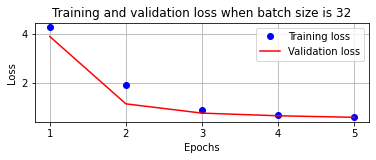

C:\Users\user\AppData\Local\Temp\ipykernel_10976\1316040814.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


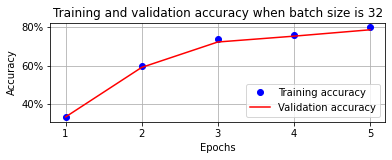

In [18]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

Here, we can see that the accuracy and loss values did not reach the same levels as that of the previous scenario, where the batch size was 32, because the time weights are updated fewer times when the batch size is 32 (1875). In the scenario where the batch size is 10,000, there were six weight updates per epoch since there were 10,000 data points per batch, which means that the total training data size was 60,000.So far, we have learned how to scale a dataset, as well as the impact of varying the batch size on the model's training time to achieve a certain accuracy. I